# TEST SUR  NOTEBOOK
 

## Import

In [1]:
import pandas as pd
import numpy as np
import os
import operator

In [23]:
import edaviz

### Jeu test  --- TITANIC

In [7]:
BASE = os.path.abspath('.')
BASE_DIR = os.path.dirname(BASE)
print("base? ", BASE)
dataset = pd.read_csv(os.path.join(BASE, "data/titanic/titanic.csv"))
dataset.info()

base?  /Users/jortoh/Desktop/OtherProjects/oc_1/dsfinesseur/dsfinesseur
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [8]:
age = dataset.Age
fare = dataset.Fare
survived = dataset.Survived
sex = dataset.Sex

## Transformation test

In [13]:
import pretraitement as tr
help(tr)

Help on module pretraitement:

NAME
    pretraitement

DESCRIPTION
    Module centré sur le preprocessing d'un jeu de données.
    Bien que basé sur un projet d'analyse de données spécifique (OpenFoodFacts),
    le contenu a pour vocation d'être générique.

FUNCTIONS
    calculer_imputation(tableau, strategie='première occurence', valeur_par_defaut=None)
        Imputer suivant la strategie choisie.
        
        Arguments d'entrée:
            tableau (pandas.DataFrame)
            strategie (str):
                'première occurence' retourne la première valeur non nulle,
                'la plus fréquente' retourne la valeur la plus fréquente non nulle
        
        Arguments de sortie:
            tableau_nettoye (pandas.DataFrame)
    
    calculer_train_test_split(y, train_rate=0.7, valid_rate=None, classes=None)
        length:
        train_rate:
        classes (list):
    
    eliminer_colonne_vide(tableau, taux_de_vide_minimum=0.5, retourner_details=True, chemin_fichie

In [14]:
test = tr.eliminer_colonne_vide(dataset, retourner_details=False)
test
# si rien ne pas faire de graph

clst df:
                     colonne  taux_de_vide
0                 Survived           0.0
1                   Pclass           0.0
2                     Name           0.0
3                      Sex           0.0
4                      Age           0.0
5  Siblings/Spouses Aboard           0.0
6  Parents/Children Aboard           0.0
7                     Fare           0.0


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [15]:
unique_data = tr.eliminer_doublons(tableau=dataset, colonnes_ciblees=None, strategie='première occurence')
unique_data.info()

l'argument colonnes_ciblees n'est pas de type list mais <class 'NoneType'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 62.4+ KB


## Correlation et type test

In [17]:
import correlation as corr
help(corr)

Help on module correlation:

NAME
    correlation

DESCRIPTION
    Fonctions permettant de calculer les différentes corrélations
    entre les variables d'un même jeu de données.
    Un vecteur peut être une liste, un Pandas.Series ou NumPy.array.

FUNCTIONS
    calculer_correlation_pearson(variable_1, variable_2)
        Calcul de la correlation entre deux variables quantitatives.
        On retourne donc une valeur entrez 0 et 1.
        
        Arguments d'entrée:
            variable_1, variable_2 (numpy.array)
        
        Arguments de sortie:
            (float)
    
    calculer_covariance(variable_1, variable_2)
        Calcul de la covariance empirique entre deux variables quantitatives.
        
        Arguments d'entrée:
            variable_1, variable_2 (numpy.array)
        
        Arguments de sortie:
            (float)
    
    calculer_tableau_contingence(variable_1, variable_2, nom_1=None, nom_2=None, rajouter_colonne_total=False)
        Calcul du tableau de 

--- type

In [19]:
from type import donner_type

In [20]:
age_type = donner_type(age)
fare_type = donner_type(fare)
sex_type = donner_type(sex)
survived_type = donner_type(survived)
age_type, fare_type, sex_type, survived_type

NameError: name 'Nature' is not defined

--- correlation qtv x qtv

In [31]:
age_fare_cov = corr.calculer_covariance(age, fare)
age_fare_cov

78.8799586890295

In [32]:
age_fare_corr = corr.calculer_correlation_pearson(age, fare)
round(age_fare_corr, 2)

0.11

In [33]:
statistique, p_value, coefficient = corr.test_correlation_pearson(age, fare)
statistique, p_value, coefficient

(3.362942646303688, 0.0004021266302663973, 0.11232863699941627)

--- correlation qtv x qlt

In [34]:
age_sex_corr = corr.test_correlation_eta_squared(age, sex)
age_sex_corr

(7.533924546397329, 0.28429788404022993, 0.008441051190548542)

--- correlation qlt x qlt

In [35]:
survived_sex_contingence = corr.calculer_tableau_contingence(survived, sex)
survived_sex_contingence

array([[ 81, 464],
       [233, 109]])

In [36]:
survived_sex_corr = corr.test_correlation_chi_squared(sex, survived)
survived_sex_corr   

(727.3097247634023, 0.0, 0.9055196672783877)

--- correlation generique

In [37]:
age_fare_cor_gen = corr.test_de_correlation(age, fare)
age_fare_cor_gen

(3.362942646303688, 0.0004021266302663973, 0.11232863699941627)

In [38]:
age_sex_cor_gen = corr.test_de_correlation(age, sex)
age_sex_cor_gen

(7.533924546397329, 0.28429788404022993, 0.008441051190548542)

In [39]:
survived_sex_cor_gen = corr.test_de_correlation(survived, sex)
survived_sex_cor_gen

(727.3097247634023, 0.0, 0.9055196672783877)

# Matrice test

--- compact form

In [53]:
compacte_matrice = corr.matrice_de_correlation(tableau=unique_data, format_compact=True, calculer_autocorrelation=False)
compacte_matrice

/Users/jortoh/Desktop/Projects/edaviz/edaviz/correlations.py:121: RuntimeWarning: invalid value encountered in double_scalars
  statistique = (coefficient * (n_quantitative - n_qualitative)


array([[[ 1.00000000e+00,             nan,  1.00000000e+00],
        [ 1.02159665e+03,  0.00000000e+00,  1.07319322e+00],
        [ 8.87000000e+02,  4.84212670e-01,  1.00000000e+00],
        [ 7.27309725e+02,  0.00000000e+00,  9.05519667e-01],
        [ 3.16179141e+00,  4.26003551e-01,  3.55992730e-03],
        [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
        [ 6.21596734e+01,  1.00901704e-01,  6.56274493e-02]],

       [[ 1.02159665e+03,  0.00000000e+00,  1.07319322e+00],
        [ 1.00000000e+00,             nan,  1.00000000e+00],
        [ 1.77400000e+03,  4.82141003e-01,  1.00000000e+00],
        [ 1.03150993e+03,  0.00000000e+00,  1.07838763e+00],
        [ 8.22222711e+01,  1.20883296e-02,  1.56846200e-01],
        [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
        [ 2.40660418e+02,  4.14659206e-03,  3.52533136e-01]],

       [[ 8.87000000

--- non compacte

In [54]:
stat_mat, p_valeur_mat, coef_mat = corr.matrice_de_correlation(tableau=unique_data, format_compact=False, calculer_autocorrelation=False)
coef_mat

array([[ 1.        ,  1.07319322,  1.        ,  0.90551967,  0.00355993,
         0.        ,  0.        ,  0.06562745],
       [ 1.07319322,  1.        ,  1.        ,  1.07838763,  0.1568462 ,
         0.        ,  0.        ,  0.35253314],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ],
       [ 0.90551967,  1.07838763,  1.        ,  1.        ,  0.00844105,
         0.        ,  0.        ,  0.03281063],
       [ 0.00355993,  0.1568462 ,  1.        ,  0.00844105,  1.        ,
        -0.26878872, -0.17500328,  0.11232864],
       [ 0.        ,  0.        ,  1.        ,  0.        , -0.26878872,
         1.        ,  0.52223037,  0.14342842],
       [ 0.        ,  0.        ,  1.        ,  0.        , -0.17500328,
         0.52223037,  1.        ,  0.19463068],
       [ 0.06562745,  0.35253314,  1.        ,  0.03281063,  0.11232864,
         0.14342842,  0.19463068,  1.        ]])

--- cellules

In [42]:
alpha = 0.5
tolerance = .1
alpha, tolerance

(0.5, 0.1)

In [57]:
corr.normaliser_significativite_booleen(p_valeur=p_valeur_mat, alpha=alpha, tolerance=tolerance)

/Users/jortoh/Desktop/Projects/edaviz/edaviz/correlations.py:301: RuntimeWarning: invalid value encountered in greater_equal
  significativite = p_valeur >= alpha


array([[False, False, False, False, False,  True,  True, False],
       [False, False, False, False, False,  True,  True, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False,  True,  True, False],
       [False, False, False, False, False,  True,  True, False],
       [ True,  True, False,  True,  True, False, False, False],
       [ True,  True, False,  True,  True, False, False, False],
       [False, False, False, False, False, False, False, False]])

In [58]:
g = lambda x: max(0, (x - alpha) / (1 - alpha))
[ list(map(g,l)) for l in p_valeur_mat ]

[[0, 0, 0, 0, 0, 1.0, 1.0, 0],
 [0, 0, 0, 0, 0, 1.0, 1.0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1.0, 1.0, 0],
 [0, 0, 0, 0, 0, 0.9999999999999996, 0.9999998439058282, 0],
 [1.0, 1.0, 0, 1.0, 0.9999999999999996, 0, 0, 0],
 [1.0, 1.0, 0, 1.0, 0.9999998439058282, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

In [59]:
f = lambda x: corr.normaliser_significativite_numerique(p_valeur=x, alpha=alpha, tolerance=tolerance, **{ 'valeur_sup': 1.0,
                              'valeur_inf': tolerance,
                              'pente': 3
                            })
data_cells = [ list(map(f,l)) for l in p_valeur_mat ]

In [60]:
sign_mat = corr.matrice_de_significativite(p_valeur_mat, alpha, False, tolerance, **{ 'valeur_sup': 1.0,
                              'valeur_inf': tolerance,
                              'pente': 3
                            })

In [47]:
from edaviz import heatmaps as hmp
help(hmp)

Help on module edaviz.heatmaps in edaviz:

NAME
    edaviz.heatmaps

DESCRIPTION
    Functions to visualize matrices of data.
    It is a custom version of a Heatmap allowing
    cells size's customization.
    It is based on matrix.py in https://github.com/mwaskom/seaborn
    ( commit 065d3c1 ) by Michael L. Waskom .

FUNCTIONS
    custom_cells_heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, data_cells=None, robust_cells=True, robust_type='percentile', vmin_cells=None, vmax_cells=None, shape_kws=None, normalize_cells=True, square_shaped_cells=True, **kwargs)
        NEW-- Tweak the function heatmap by adding a third variable.

DATA
    __all__ = ['custom_cells_heatmap']

FILE
    /Users/jortoh/Desktop/Projects/edaviz/edaviz/heatmaps.py




# Heatmap test

In [61]:
sign_mat

array([[0.55      , 0.55      , 0.55      , 0.55      , 0.55      ,
        0.99397643, 0.99397643, 0.55      ],
       [0.55      , 0.55      , 0.55      , 0.55      , 0.55      ,
        0.99397643, 0.99397643, 0.55      ],
       [0.55      , 0.55      , 0.55      , 0.55      , 0.55      ,
        0.55      , 0.55      , 0.55      ],
       [0.55      , 0.55      , 0.55      , 0.55      , 0.55      ,
        0.99397643, 0.99397643, 0.55      ],
       [0.55      , 0.55      , 0.55      , 0.55      , 0.55      ,
        0.99397643, 0.99397643, 0.55      ],
       [0.99397643, 0.99397643, 0.55      , 0.99397643, 0.99397643,
        0.55      , 0.55      , 0.55      ],
       [0.99397643, 0.99397643, 0.55      , 0.99397643, 0.99397643,
        0.55      , 0.55      , 0.55      ],
       [0.55      , 0.55      , 0.55      , 0.55      , 0.55      ,
        0.55      , 0.55      , 0.55      ]])

In [52]:
stat_mat

array([[ 1.00000000e+00,  1.02159665e+03,  8.87000000e+02,
         7.27309725e+02,  3.16179141e+00,  0.00000000e+00,
         0.00000000e+00,  6.21596734e+01],
       [ 1.02159665e+03,  1.00000000e+00,  1.77400000e+03,
         1.03150993e+03,  8.22222711e+01,  0.00000000e+00,
         0.00000000e+00,  2.40660418e+02],
       [ 8.87000000e+02,  1.77400000e+03,  1.00000000e+00,
         8.87000000e+02,  0.00000000e+00,             nan,
                    nan, -0.00000000e+00],
       [ 7.27309725e+02,  1.03150993e+03,  8.87000000e+02,
         1.00000000e+00,  7.53392455e+00,  0.00000000e+00,
         0.00000000e+00,  3.00224588e+01],
       [ 3.16179141e+00,  8.22222711e+01,  0.00000000e+00,
         7.53392455e+00,  1.00000000e+00, -8.30169122e+00,
        -5.28776536e+00,  3.36294265e+00],
       [ 0.00000000e+00,  0.00000000e+00,             nan,
         0.00000000e+00, -8.30169122e+00,  1.00000000e+00,
         1.82173122e+01,  4.31142194e+00],
       [ 0.00000000e+00,  0.000000

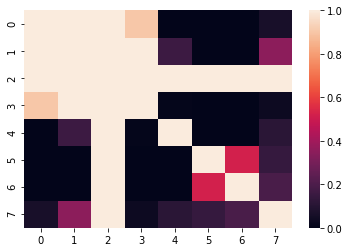

In [63]:
# rayon a looker
# mesh à revoir
hmp.custom_cells_heatmap(data=coef_mat, data_cells=sign_mat, vmin=0., vmax=1., square_shaped_cells=True, linewidths=3.)